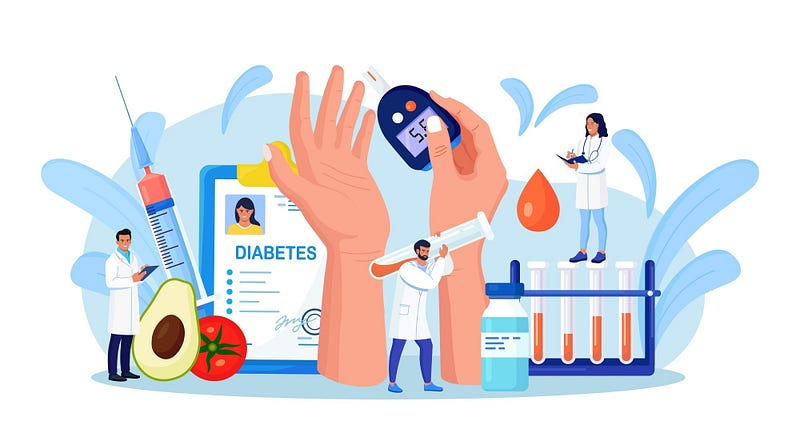
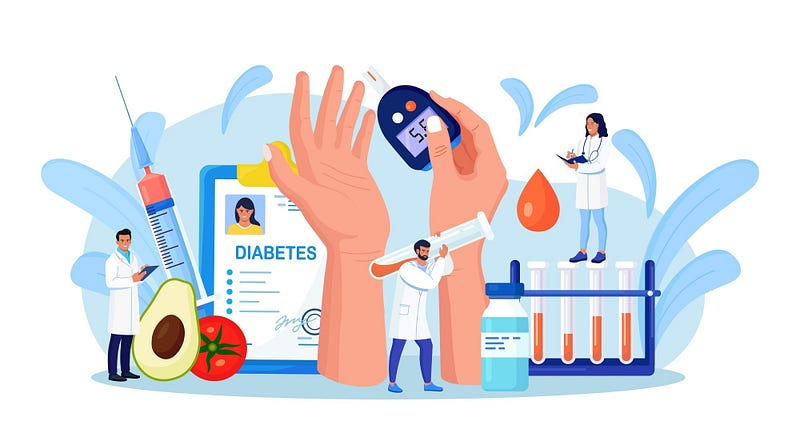

## 🩺 Dataset Overview

This dataset contains comprehensive **medical and demographic information** from 
patients, along with their **diabetes status** (positive or negative).It is designed to help develop **machine learning models** that can predict diabetes risk based on individual health indicators.The data can support healthcare professionals in **early diagnosis** and assist researchers in understanding key factors contributing to diabetes.

---

### 📊 Feature Descriptions

**Age**  
As people get older, their chances of getting diabetes increase. This can happen because of less physical activity, body changes, and other health issues.

**Gender**  
Men and women can have different risks of diabetes. For example, women who had diabetes during pregnancy are more likely to get type 2 diabetes later.

**Body Mass Index (BMI)**  
BMI shows if a person’s weight is healthy for their height. A high BMI means more body fat, which can make it harder for the body to control blood sugar.

**Hypertension**  
High blood pressure (hypertension) often occurs with diabetes. People with high blood pressure are more likely to develop diabetes.

**Heart Disease**  
Heart problems and diabetes are closely related. Having one can increase the chance of getting the other because both share similar risk factors.

**Smoking History**  
Smoking can increase the risk of diabetes. It affects how the body uses insulin. Quitting smoking can lower this risk.

**HbA1c Level**  
This shows the average blood sugar level from the past 2–3 months. Higher values mean blood sugar has been high for a while.

**Blood Glucose Level**  
This tells how much sugar is in the blood right now. High levels can mean that the body is not using insulin properly or may have diabetes.

---

### 🎯 Objective

The primary goal of this dataset is to **predict diabetes status** using patient demographics and medical data.  
It helps identify individuals at higher risk and can assist in early diagnosis and personalized treatment planning.

---

### 🎯 Analysis Goals

- Perform **exploratory data analysis (EDA)** on demographic and health indicators  
- Visualize the relationships between various medical features  
- Identify **key risk factors** contributing to diabetes  
- Develop **classification models** to predict diabetes status  
- Derive **actionable insights** to support early diagnosis and prevention strategies


# <p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#06445e;">1. DATA LOADING & INITAIL EXAMINATION</p>

## 1.1 Import Libraries

In [1]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
# Suppress all warnings
warnings.filterwarnings("ignore")

# Show plots in the notebook
%matplotlib inline

# Import Model and Preprocessing Tools
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay

## 1.2 Load the Dataset

In [2]:
df = pd.read_csv("/kaggle/input/diabetes-prediction-dataset/diabetes_prediction_dataset.csv")

## 1.3 Preview the Dataset

In [3]:
df. head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


### Let's see the columns

In [4]:
df.columns


Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

## 1.4 Columns Names and Data Types

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


## 1.5 Check the null values

In [6]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

## 1.6 Data distribution

In [7]:
df.describe().style.format("{:.2f}")

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00
mean,41.89,0.07,0.04,27.32,5.53,138.06,0.09
std,22.52,0.26,0.19,6.64,1.07,40.71,0.28
min,0.08,0.00,0.00,10.01,3.50,80.00,0.00
25%,24.00,0.00,0.00,23.63,4.80,100.00,0.00
50%,43.00,0.00,0.00,27.32,5.80,140.00,0.00
75%,60.00,0.00,0.00,29.58,6.20,159.00,0.00
max,80.00,1.00,1.00,95.69,9.00,300.00,1.00


## 📝 Observations

- The dataset contains **100,000 rows** and **9 columns**, covering both medical and demographic information.  
- All columns have **non-null values**, meaning there are **no missing entries** in the dataset.  
- Data types are appropriate for analysis:
  - **Categorical features:** `gender`, `smoking_history`
  - **Numerical features:** `age`, `bmi`, `HbA1c_level`, `blood_glucose_level`
  - **Binary features:** `hypertension`, `heart_disease`, `diabetes`
- The dataset appears to be **well-structured and clean**, which makes it ready for exploratory data analysis (EDA).
- The target variable is **`diabetes`**, where `1` indicates diabetic and `0` indicates non-diabetic individuals.

---

# <p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#06445e;">2. EXPLORATORY DATA ANALYSIS </p></p>

## 2.1 Dealing with Duplicate Entries

In [8]:
duplicate_rows = df[df.duplicated()]
print("Duplicate rows: ", duplicate_rows.shape)

Duplicate rows:  (3854, 9)


In [9]:
df = df.drop_duplicates()

## 2.2 Check Uniqueness
  ##### To do this we have to loop through each column and count the number of distinct values

In [10]:
for column in df.columns:
    num_distinct_val = len(df[column].unique())
    print(f"{column}:{num_distinct_val} distinct values")

gender:3 distinct values
age:102 distinct values
hypertension:2 distinct values
heart_disease:2 distinct values
smoking_history:6 distinct values
bmi:4247 distinct values
HbA1c_level:18 distinct values
blood_glucose_level:18 distinct values
diabetes:2 distinct values


## 2.3.Univariate Analysis

### 2.3.1 Distribution of Ages

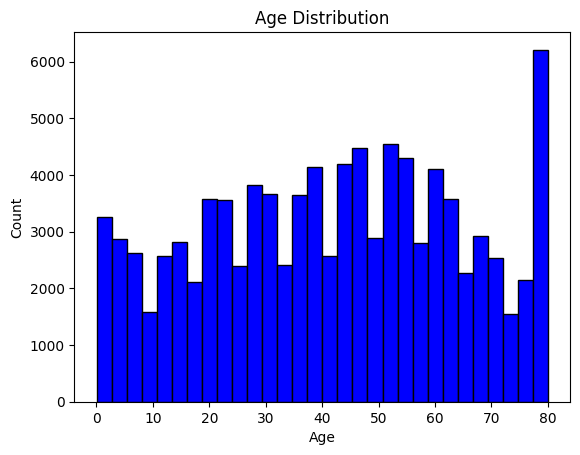

In [11]:
plt.hist(df['age'], bins=30, color='blue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

### 2.3.2 Distribution of BMI

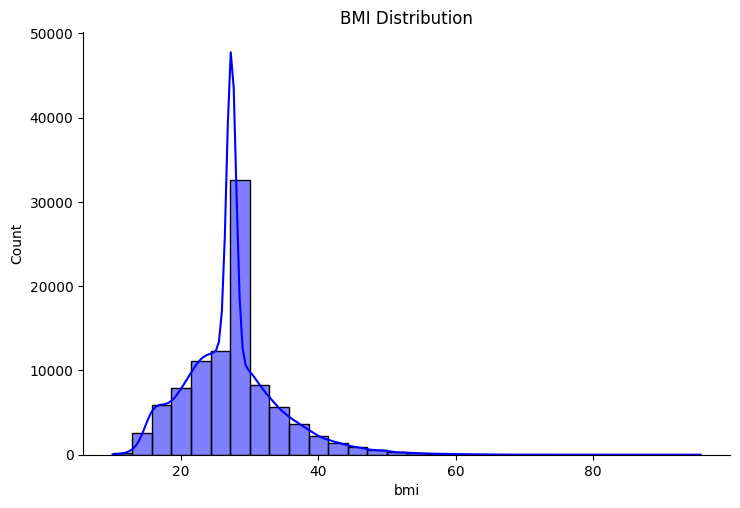

In [12]:
sns.displot(df['bmi'], bins=30, kde=True, color='blue', height=5, aspect=1.5)
plt.title('BMI Distribution')
plt.show()

### 2.3.3 Gender Distribution

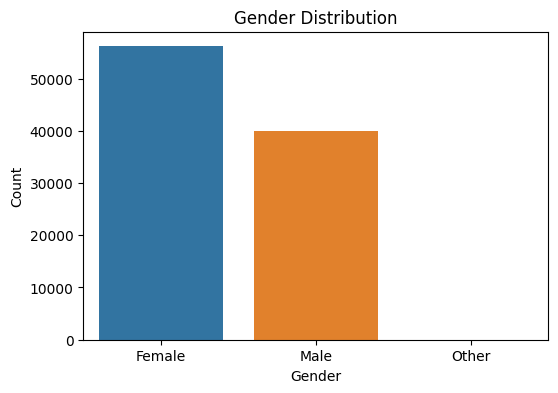

In [13]:
plt.figure(figsize=(6,4))
sns.countplot(x='gender', data=df)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


### 2.3.4 Smoking Status

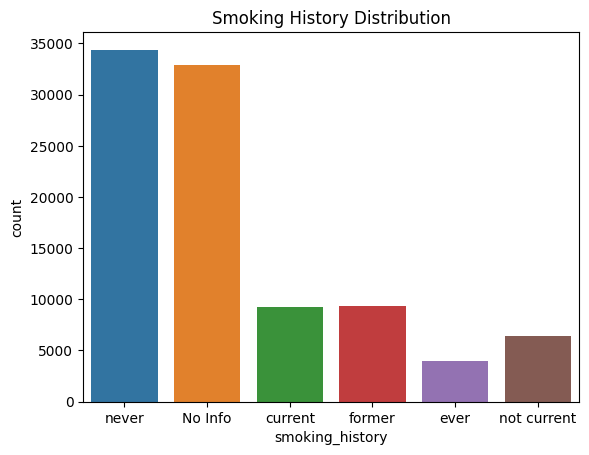

In [14]:
sns.countplot(x='smoking_history', data=df)
plt.title('Smoking History Distribution')
plt.show()

### 2.3.4 Distribution of Binary Variables

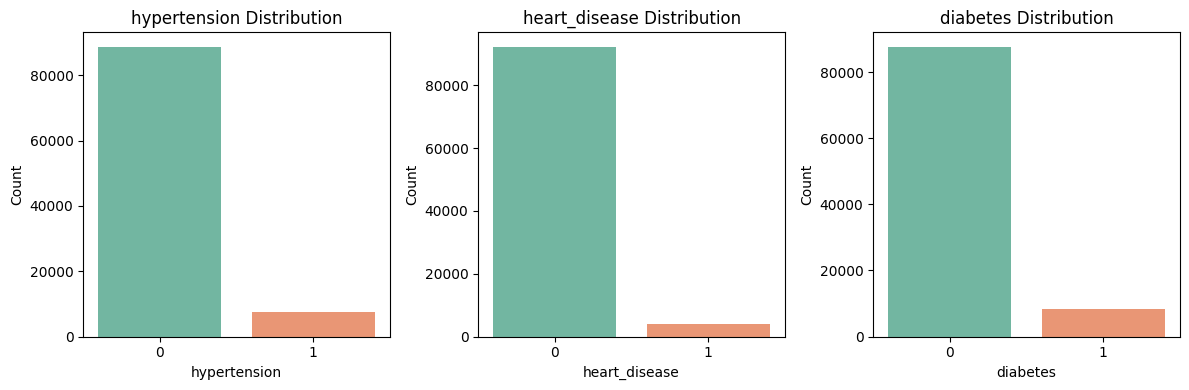

In [15]:
binary_cols = ['hypertension', 'heart_disease', 'diabetes'] 
plt.figure(figsize=(12,4))
for i, col in enumerate(binary_cols):
    plt.subplot(1, len(binary_cols), i+1)
    sns.countplot(x=col, data=df, palette='Set2')
    plt.title(f'{col} Distribution')
    plt.ylabel('Count')
plt.tight_layout()
plt.show()


## 2.4 Multivariate Analysis

### 2.4.1 Age vs BMI by Databases Status

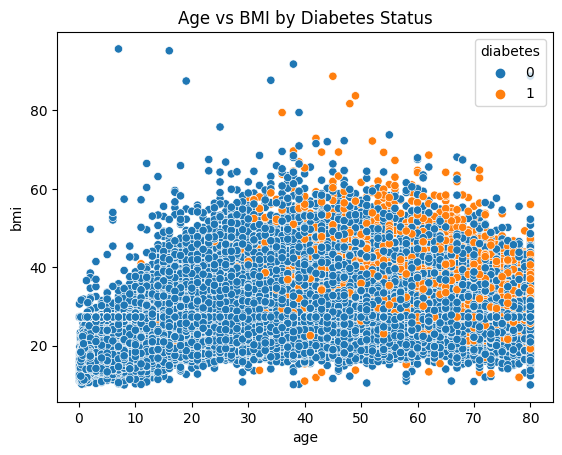

In [16]:
sns.scatterplot(x='age', y='bmi', hue='diabetes', data=df)
plt.title('Age vs BMI by Diabetes Status')
plt.show()


### 2.4.2 Boxplot BMI vs Diabetes classification

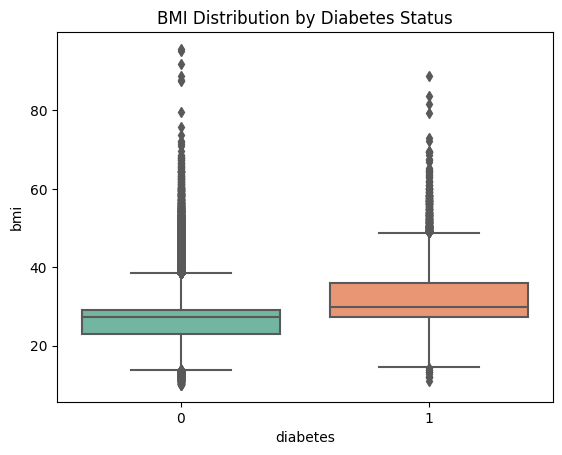

In [17]:
sns.boxplot(x='diabetes', y='bmi', data=df, palette='Set2')
plt.title('BMI Distribution by Diabetes Status')
plt.show()

### 2.4.3 Interaction between gender, Age and diabetes

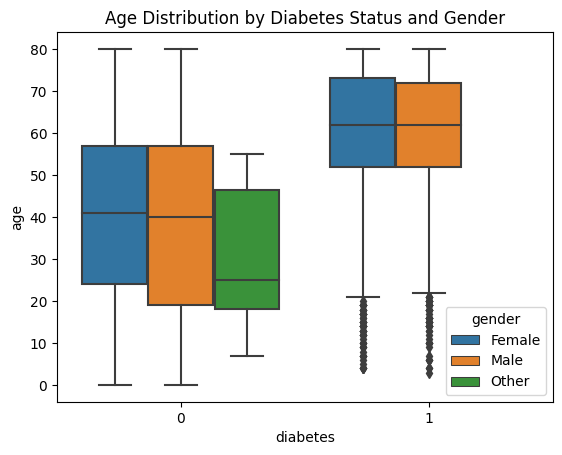

In [18]:

sns.boxplot(x='diabetes', y='age', hue='gender', data=df)
plt.title('Age Distribution by Diabetes Status and Gender')
plt.show()

# <p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#06445e;">3. DATA PREPROCESSING </p></p>

## 3.1 Encode Categorical Variables


### We use here pd.get_dummies. So what pd.get_dummies() Does

- pd.get_dummies() converts categorical columns (text labels like “Male”, “Female”, etc.) into numerical columns that ML models can understand.

- This process is called One-Hot Encoding.

In [19]:
# Encode categorical variables
df_encoded = pd.get_dummies(df, columns=['gender', 'smoking_history'], drop_first=True)
df_encoded = pd.get_dummies(df, columns=['gender','smoking_history'])
df_encoded.head()


,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Female,gender_Male,gender_Other,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,80.0,0,1,25.19,6.6,140,0,True,False,False,False,False,False,False,True,False
1,54.0,0,0,27.32,6.6,80,0,True,False,False,True,False,False,False,False,False
2,28.0,0,0,27.32,5.7,158,0,False,True,False,False,False,False,False,True,False
3,36.0,0,0,23.45,5.0,155,0,True,False,False,False,True,False,False,False,False
4,76.0,1,1,20.14,4.8,155,0,False,True,False,False,True,False,False,False,False


### 3.2 Correlation Matrix

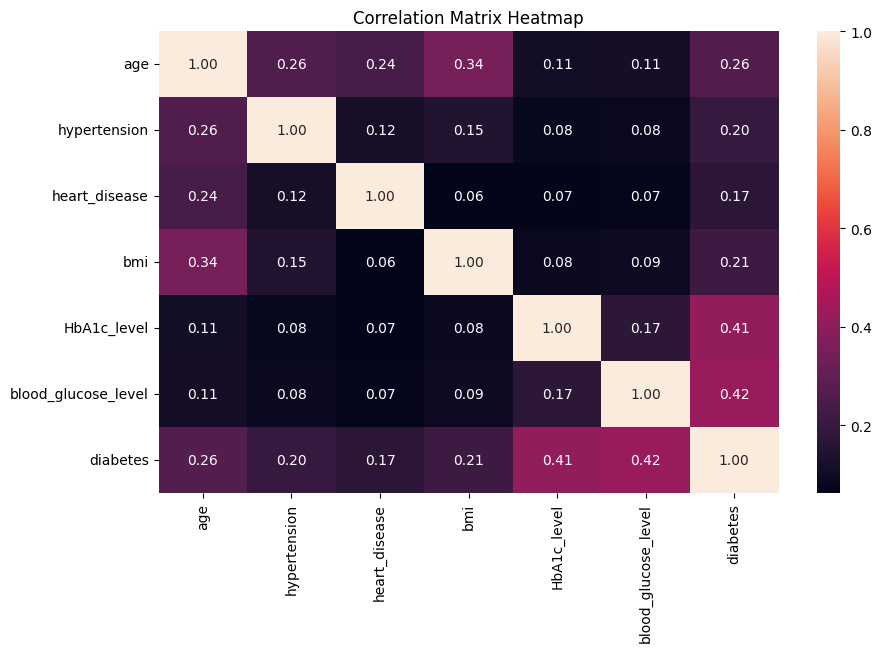

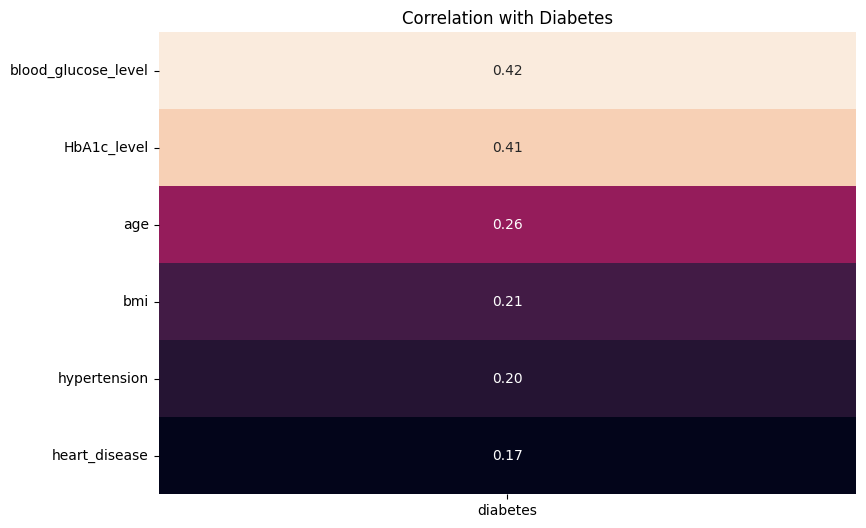

In [20]:
# 🔹 Correlation Matrix Heatmap (All Numeric Features)
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='rocket', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

# 🔹 Correlation with Target Variable (Diabetes)
target_corr = df.corr(numeric_only=True)['diabetes'].drop('diabetes').sort_values(ascending=False)

plt.figure(figsize=(9, 6))
sns.heatmap(target_corr.to_frame(), annot=True, cmap='rocket', fmt='.2f', cbar=False)
plt.title('Correlation with Diabetes')
plt.show()


### 🔍 Key Observations from Correlation Matrix

#### 📘 Tips:
Correlation values range from **–1 to +1**:
- **+1** → Perfect positive correlation (both increase together)  
- **–1** → Perfect negative correlation (one increases, the other decreases)  
- **0** → No linear relationship  

---

#### 📊 Observations:
- **Blood glucose level (0.42)** and **HbA1c level (0.41)** show the **strongest positive correlation** with **diabetes**.  
- **Age (0.26)** and **BMI (0.21)** have **moderate correlations** with **diabetes**.  
- **Hypertension (0.20)** and **Heart disease (0.17)** show **weak relationships** with **diabetes**.  
- **Age** is **moderately related** to **BMI** and **hypertension**.  
- Other features show **very low correlation**, indicating **little linear dependence**.


## 3.3 Detect Outliers

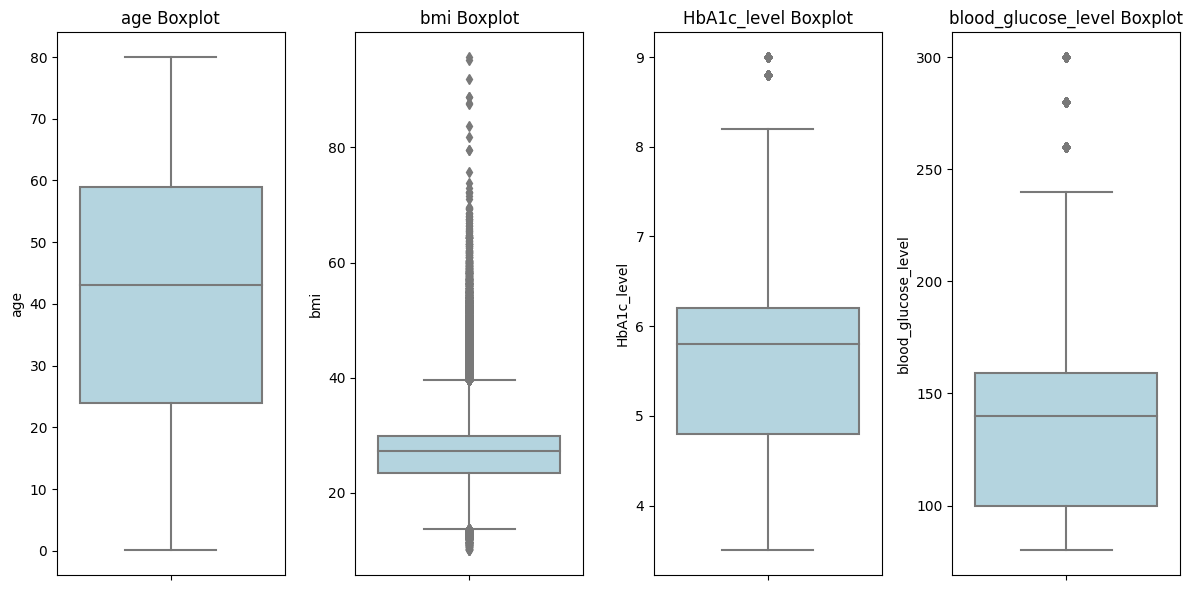

In [21]:
numeric_cols = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']

plt.figure(figsize=(12, 6))
for i, col in enumerate(numeric_cols):
    plt.subplot(1, len(numeric_cols), i+1)
    sns.boxplot(y=df[col], color='lightblue')
    plt.title(f"{col} Boxplot")
plt.tight_layout()
plt.show()


### Capping Outliers (Winsorization)

In [22]:
def cap_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[column] = np.where(data[column] < lower_bound, lower_bound,
                            np.where(data[column] > upper_bound, upper_bound, data[column]))
    return data

# Apply only to bmi and blood_glucose_level
for col in ['bmi', 'blood_glucose_level']:
    df = cap_outliers(df, col)


## 3.4 Define Features (X) and Target (y)

In [23]:
X = df_encoded.drop('diabetes', axis=1)
y = df_encoded['diabetes']



## 3.5 Train-Test Split

In [24]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y )

# <p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#06445e;">4. APPLYING MECHINE LEARNING ALGORITHM</p></p>

## 4.1 Apply Logistic Regression

Logistic Regression is one of the most fundamental classification algorithms in machine learning.It models the probability that a given input belongs to a particular class using a sigmoid function, making it ideal for binary classification problems.Despite its simplicity, it often performs surprisingly well on linearly separable datasets and serves as a strong baseline model.

Logistic Regression Results
Test Accuracy: 0.96
Mean CV Accuracy: 0.959


<Figure size 500x400 with 0 Axes>

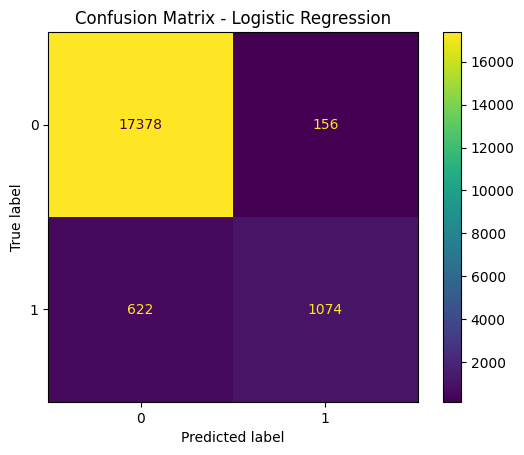

In [25]:

from sklearn.linear_model import LogisticRegression

#  Train Logistic Regression
lr_model = LogisticRegression(
    C=1, 
    penalty='l2', 
    solver='liblinear', 
    max_iter=200
)
lr_model.fit(X_train, y_train)

#Test Accuracy 
y_pred_lr = lr_model.predict(X_test)
test_acc_lr = accuracy_score(y_test, y_pred_lr)

#  Cross-Validation Accuracy 
cv_scores_lr = cross_val_score(lr_model, X, y, cv=5, scoring='accuracy')
cv_mean_lr = cv_scores_lr.mean()

#Print Results 
print("Logistic Regression Results")
print("Test Accuracy:", round(test_acc_lr, 3))
print("Mean CV Accuracy:", round(cv_mean_lr, 3))

# Confusion Matrix 
plt.figure(figsize=(5, 4))
ConfusionMatrixDisplay.from_estimator(lr_model, X_test, y_test)
plt.title('Confusion Matrix - Logistic Regression')
plt.show()


## 4.2 Apply Random Forest Model

Random Forest is an ensemble learning method that combines the predictions of multiple decision trees to improve accuracy and control overfitting.Each tree is trained on a random subset of data and features, and the final prediction is made by majority voting.It’s powerful, interpretable, and performs well on both classification and regression tasks.

Random Forest Results
Test Accuracy: 0.969
Mean CV Accuracy: 0.968


<Figure size 500x400 with 0 Axes>

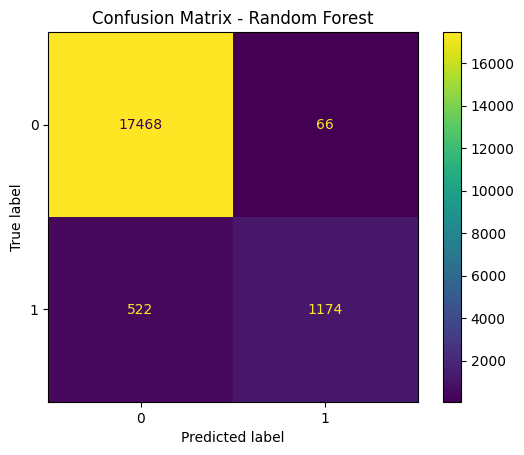

In [26]:
from sklearn.ensemble import RandomForestClassifier


# Train Random Forest 
rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)
rf_model.fit(X_train, y_train)

#Test Accuracy
y_pred_rf = rf_model.predict(X_test)
test_acc_rf = accuracy_score(y_test, y_pred_rf)

# Cross-Validation Accuracy 
cv_scores_rf = cross_val_score(rf_model, X, y, cv=5, scoring='accuracy')
cv_mean_rf = cv_scores_rf.mean()

#Print Results
print("Random Forest Results")
print("Test Accuracy:", round(test_acc_rf, 3))
print("Mean CV Accuracy:", round(cv_mean_rf, 3))

# Confusion Matrix 
plt.figure(figsize=(5, 4))
ConfusionMatrixDisplay.from_estimator(rf_model, X_test, y_test)
plt.title('Confusion Matrix - Random Forest')
plt.show()


### 4.3 Apply XGBoost Model

XGBoost (Extreme Gradient Boosting) is a high-performance gradient boosting framework designed for speed and efficiency.It builds an ensemble of weak learners (decision trees), where each subsequent tree focuses on correcting the errors made by the previous ones.XGBoost is widely used in Kaggle competitions due to its regularization, parallel processing, and robust generalization capabilities.

XGBoost Results
Test Accuracy: 0.972
Mean CV Accuracy: 0.971


<Figure size 500x400 with 0 Axes>

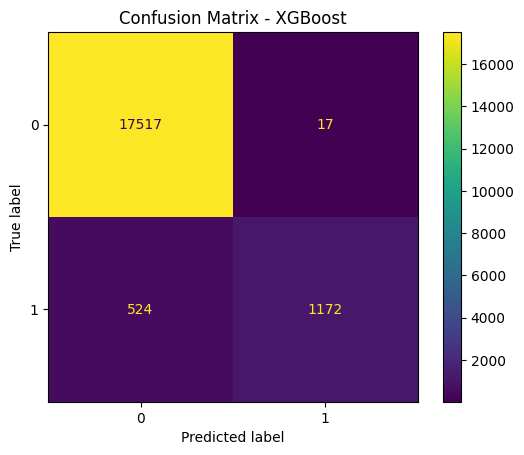

In [27]:
from xgboost import XGBClassifier

# Train XGBoost
xgb_model = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    random_state=42,
    use_label_encoder=False,  # Avoid warning
    eval_metric='logloss'     # Required in newer versions
)
xgb_model.fit(X_train, y_train)

#Test Accuracy
y_pred_xgb = xgb_model.predict(X_test)
test_acc_xgb = accuracy_score(y_test, y_pred_xgb)

#Cross-Validation Accuracy 
cv_scores_xgb = cross_val_score(xgb_model, X, y, cv=5, scoring='accuracy')
cv_mean_xgb = cv_scores_xgb.mean()

#  Print Results
print("XGBoost Results")
print("Test Accuracy:", round(test_acc_xgb, 3))
print("Mean CV Accuracy:", round(cv_mean_xgb, 3))

#Confusion Matrix 
plt.figure(figsize=(5, 4))
ConfusionMatrixDisplay.from_estimator(xgb_model, X_test, y_test)
plt.title('Confusion Matrix - XGBoost')
plt.show()


## 4.4 Apply LightGBM (LGBMClassifier) Model

LightGBM is a fast, distributed, and high-performance gradient boosting framework developed by Microsoft.
It uses a leaf-wise tree growth algorithm instead of level-wise growth, which helps achieve better accuracy and faster training on large datasets.LightGBM is particularly efficient with large-scale data and supports parallel learning.

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 6786, number of negative: 70130
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002901 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 416
[LightGBM] [Info] Number of data points in the train set: 76916, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.088226 -> initscore=-2.335489
[LightGBM] [Info] Start training from score -2.335489
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 6785, number of negative: 70131
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001922 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_

<Figure size 500x400 with 0 Axes>

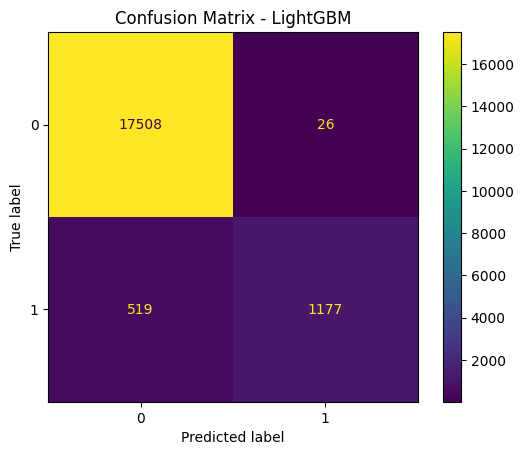

In [28]:
from lightgbm import LGBMClassifier

# Train LightGBM
lgbm_model = LGBMClassifier(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=-1,
    random_state=42
)
lgbm_model.fit(X_train, y_train)

#Test Accuracy 
y_pred_lgbm = lgbm_model.predict(X_test)
test_acc_lgbm = accuracy_score(y_test, y_pred_lgbm)

#Cross-Validation Accuracy 
cv_scores_lgbm = cross_val_score(lgbm_model, X, y, cv=5, scoring='accuracy')
cv_mean_lgbm = cv_scores_lgbm.mean()

#Print Results 
print("LightGBM Results")
print("Test Accuracy:", round(test_acc_lgbm, 3))
print("Mean CV Accuracy:", round(cv_mean_lgbm, 3))

# Confusion Matrix
plt.figure(figsize=(5, 4))
ConfusionMatrixDisplay.from_estimator(lgbm_model, X_test, y_test)
plt.title('Confusion Matrix - LightGBM')
plt.show()


## 4.5 Apply CatBoostClassifier

CatBoost (Categorical Boosting) is a gradient boosting algorithm developed by Yandex that handles categorical features automatically without requiring one-hot encoding.It uses ordered boosting and symmetric tree structures to reduce overfitting and improve generalization.CatBoost often provides excellent out-of-the-box performance with minimal tuning and is especially strong on structured/tabular data.

CatBoost Results
Test Accuracy: 0.971
Mean CV Accuracy: 0.971


<Figure size 500x400 with 0 Axes>

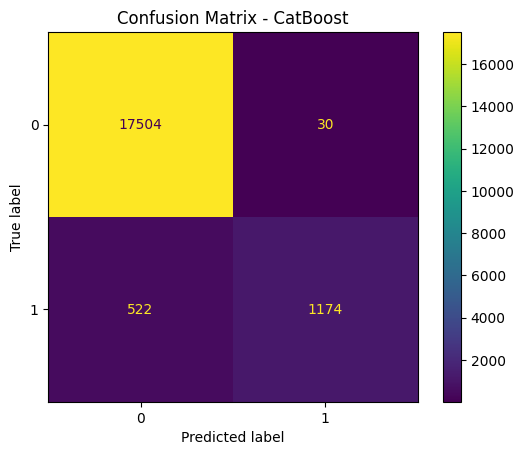

In [29]:
from catboost import CatBoostClassifier


# Train CatBoost
cat_model = CatBoostClassifier(
    iterations=300,
    learning_rate=0.05,
    depth=8,
    random_state=42,
    verbose=0
)
cat_model.fit(X_train, y_train)

#Test Accuracy 
y_pred_cat = cat_model.predict(X_test)
test_acc_cat = accuracy_score(y_test, y_pred_cat)

#Cross-Validation Accuracy
cv_scores_cat = cross_val_score(cat_model, X, y, cv=5, scoring='accuracy')
cv_mean_cat = cv_scores_cat.mean()

#  Print Results
print("CatBoost Results")
print("Test Accuracy:", round(test_acc_cat, 3))
print("Mean CV Accuracy:", round(cv_mean_cat, 3))

# Confusion Matrix 
plt.figure(figsize=(5, 4))
ConfusionMatrixDisplay.from_estimator(cat_model, X_test, y_test)
plt.title('Confusion Matrix - CatBoost')
plt.show()


# <p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#06445e;">5. CONCLUSION</p></p>

In this project, several machine learning models were trained and evaluated, including **Logistic Regression**, **Random Forest**, **XGBoost**, **LightGBM**, and **CatBoost**.  
The objective was to identify the model that achieves the best trade-off between **accuracy**, **stability**, and **modern performance**.




## 5.1 Final Model Comparison Visualization

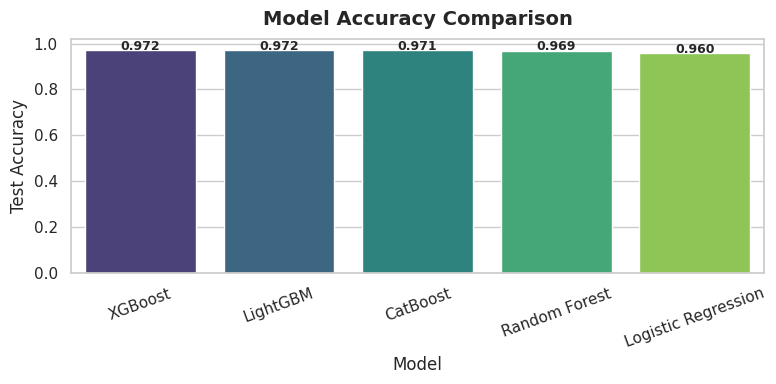

Best Model: XGBoost  |  Test Accuracy = 0.972  |  CV Accuracy = 0.971


In [30]:


# Results summary
results = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest", "XGBoost", "LightGBM", "CatBoost"],
    "Test Accuracy": [test_acc_lr, test_acc_rf, test_acc_xgb, test_acc_lgbm, test_acc_cat],
    "CV Accuracy": [cv_mean_lr, cv_mean_rf, cv_mean_xgb, cv_mean_lgbm, cv_mean_cat]
}).sort_values(by="Test Accuracy", ascending=False)

# Visualization
sns.set_theme(style="whitegrid")
plt.figure(figsize=(8,4))
sns.barplot(data=results, x="Model", y="Test Accuracy", palette="viridis")
plt.title("Model Accuracy Comparison", fontsize=14, weight='bold', pad=10)
plt.xticks(rotation=20)
for i, v in enumerate(results["Test Accuracy"]):
    plt.text(i, v + 0.001, f"{v:.3f}", ha='center', fontsize=9, weight='bold')
plt.tight_layout()
plt.show()

# Best model summary
best = results.iloc[0]
print(f"Best Model: {best['Model']}  |  Test Accuracy = {best['Test Accuracy']:.3f}  |  CV Accuracy = {best['CV Accuracy']:.3f}")


### 🔹 Model Performance Summary
All models achieved high accuracy, with gradient boosting methods outperforming traditional models:

| Model                  | Test Accuracy | CV Accuracy |
|------------------------|---------------|-------------|
| Logistic Regression    | 0.960         | 0.959       |
| Random Forest          | 0.969         | 0.968       |
| **XGBoost**            | **0.972**     | **0.971**   |
| LightGBM               | 0.972         | 0.971       |
| CatBoost               | 0.971         | 0.971       |

### 📊 Key Insights
- **Logistic Regression** provided a strong baseline (~96%).  
- **Random Forest** improved performance through ensemble learning (~96.9%).  
- **Gradient Boosting models (XGBoost, LightGBM, CatBoost)** achieved the highest accuracy (~97.1–97.2%).  
- **XGBoost** emerged as the best model in this evaluation, showing both **high test and cross-validation accuracy**.

### 🏆 Best Model
> **XGBoost**  
> **Test Accuracy:** 0.972  
> **CV Accuracy:** 0.971  

**Reason for Selection:**  
XGBoost offers **excellent accuracy**, **robust performance**, and **modern gradient boosting capabilities**, making it ideal for production-ready ML pipelines and real-world datasets.

## 💬 Author’s Message

Thanks for checking out this notebook!  
I enjoyed exploring and comparing different ML models — **Logistic Regression**, **Random Forest**, **XGBoost**, **LightGBM**, and **CatBoost**.  
If you found this notebook helpful, feel free to upvote 👍 and leave your feedback or suggestions — they are always appreciated and help me improve further!

**Author:** *Adnan Zaman*  
**Jessore University of Science and Technology**
